In [ ]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
car_data = pd.read_csv('/content/car_data.csv')


In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car_data.describe()
car_data.columns
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']



Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
from matplotlib import style

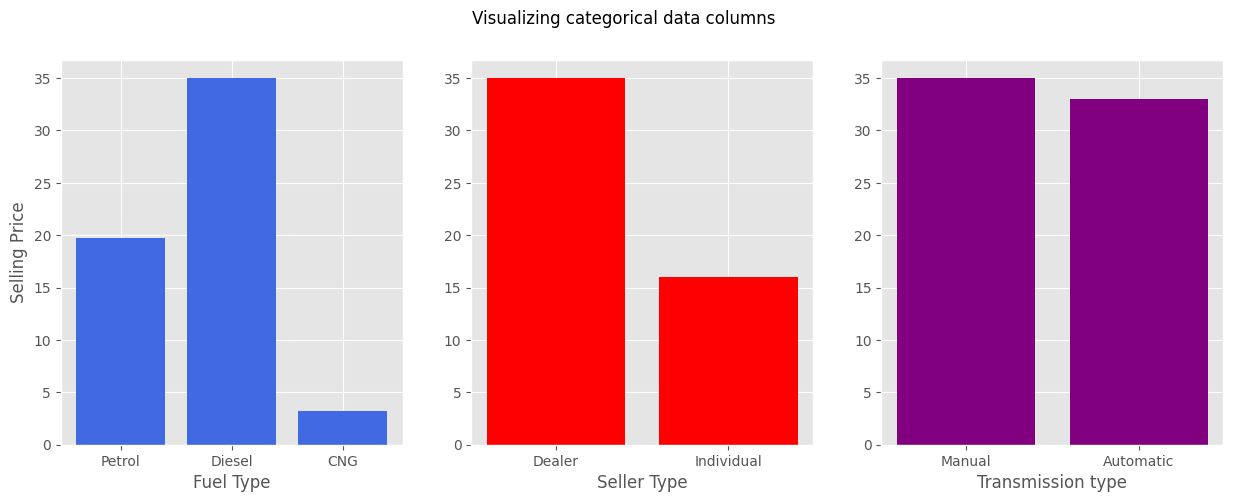

In [ ]:

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()


<Axes: xlabel='Transmission', ylabel='Selling_Price'>

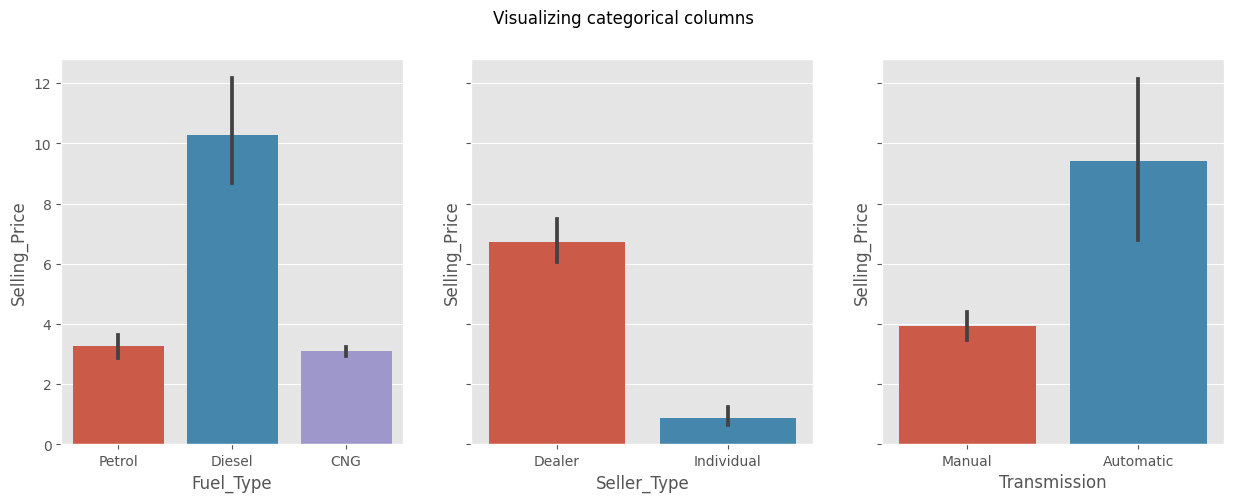

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])


In [ ]:
petrol_data = car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [ ]:
seller = car_data.groupby('Seller_Type').get_group('Dealer')
seller.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


In [ ]:
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
#one hot encoding
car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)

<ipython-input-13-c7b23842a19e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(), annot=True)


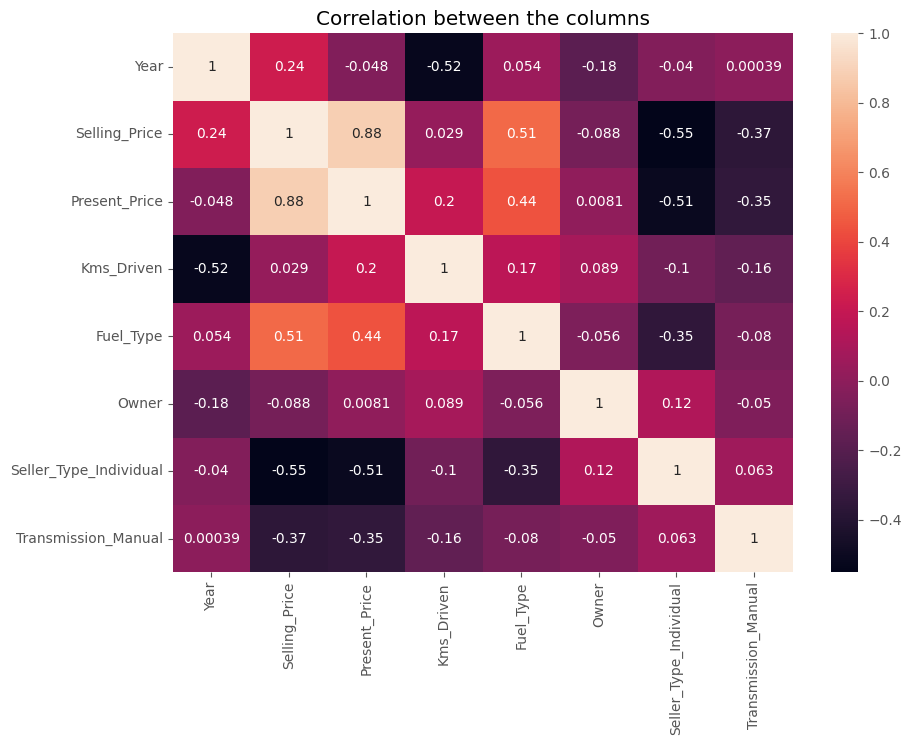

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()


<Axes: title={'center': 'Correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

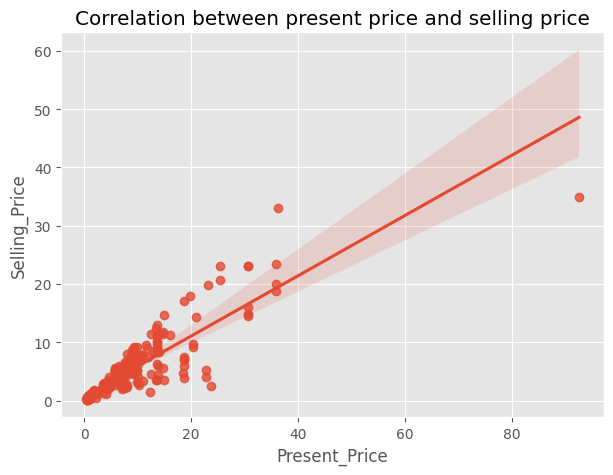

In [ ]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)


In [ ]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']


In [ ]:

print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)


Shape of X is:  (301, 7)
Shape of y is:  (301,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape:  (91,)
y_train shape: (210,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))


MAE:  1.258140470647337
MSE:  3.493286026225147
R2 score:  0.8294933369778817


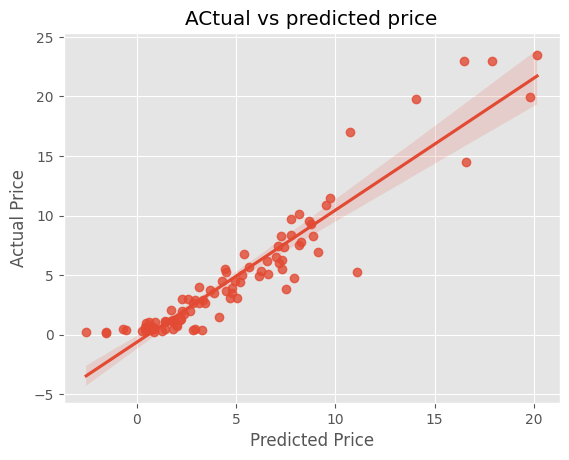

In [ ]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso



lasso_model = Lasso(alpha=1.0)

# Fit the model
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Lasso Regression Mean Squared Error: {mse}")


Lasso Regression Mean Squared Error: 8.069224705600961


In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)

# Fit the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Ridge Regression Mean Squared Error: {mse}")


Ridge Regression Mean Squared Error: 3.512841301037528


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train.ravel())

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Regressor Mean Squared Error: {mse}")


Random Forest Regressor Mean Squared Error: 1.052924072967034


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
gb_model.fit(X_train, y_train.ravel())

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Gradient Boosting Regressor Mean Squared Error: {mse}")


Gradient Boosting Regressor Mean Squared Error: 1.2305219821214441


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import pandas as pd


ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
linear_model = LinearRegression()

models = [ridge_model, lasso_model, rf_model, gb_model, linear_model]
model_names = ['Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting', 'Linear Regression']

# Create a DataFrame to store results
results_df = pd.DataFrame(index=model_names, columns=['R-squared (Train)', 'R-squared (Test)', 'Cross-validated Score'])

for model, name in zip(models, model_names):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)

    # Predict on test set
    y_test_pred = model.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)

    # Cross-validated score
    cv_scores = cross_val_score(model, X, y.ravel(), cv=5, scoring='r2')

    # Store results in DataFrame
    results_df.loc[name] = [r2_train, r2_test, cv_scores.mean()]

# Display the results
print(results_df)


                  R-squared (Train) R-squared (Test) Cross-validated Score
Ridge                      0.876106         0.876631            -18.029509
Lasso                      0.763521         0.716613            -16.260705
Random Forest              0.980402         0.963022               0.37185
Gradient Boosting          0.996773         0.956785              0.327609
Linear Regression          0.876125         0.877318             -18.31026


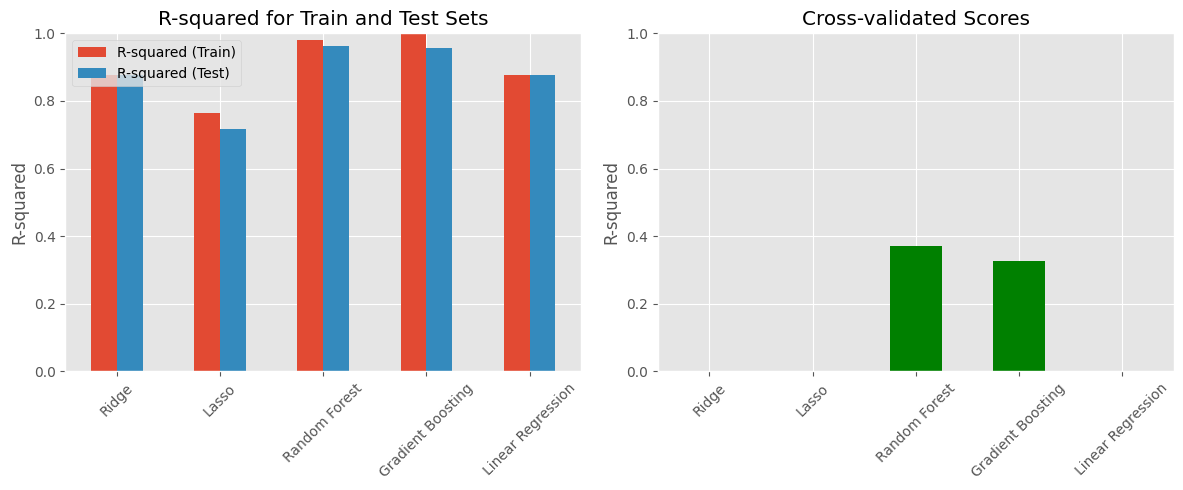

In [ ]:
import matplotlib.pyplot as plt

# Plotting R-squared errors for train and test sets
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot R-squared for train set
results_df[['R-squared (Train)', 'R-squared (Test)']].plot(kind='bar', ax=axes[0], rot=45)
axes[0].set_title('R-squared for Train and Test Sets')
axes[0].set_ylabel('R-squared')
axes[0].set_ylim(0, 1)

# Plot cross-validated scores
results_df['Cross-validated Score'].plot(kind='bar', ax=axes[1], rot=45, color='green')
axes[1].set_title('Cross-validated Scores')
axes[1].set_ylabel('R-squared')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

